<a href="https://colab.research.google.com/github/crusader2000/ml_training/blob/master/tensorflow/Tensorflow_Part1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip install tensorflow
!pip install scikit-learn
!pip install tensorflow-datasets  

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

Data Generation

In [0]:
observations =1000

xs=np.random.uniform(low=-10,high=10,size=(observations,1))
zs=np.random.uniform(low=-10,high=10,size=(observations,1))

generated_inputs=np.column_stack((xs,zs))

noise=np.random.uniform(-1,1,(observations,1))

generated_targets=2*xs-3*zs+5+noise

np.savez('TF_intro',inputs=generated_inputs,targets=generated_targets)

Solving with Tensorflow

In [0]:
training_data = np.load('TF_intro.npz')

In [0]:
input_size = 2
output_size = 1

model=tf.keras.Sequential([
                           tf.keras.layers.Dense(output_size)
])

model.compile(optimizer='sgd',loss='mean_squared_error')

model.fit(training_data['inputs'],training_data['targets'],epochs=100,verbose=2)

Epoch 1/100
32/32 - 0s - loss: 26.5230
Epoch 2/100
32/32 - 0s - loss: 4.3317
Epoch 3/100
32/32 - 0s - loss: 1.4742
Epoch 4/100
32/32 - 0s - loss: 0.6331
Epoch 5/100
32/32 - 0s - loss: 0.4346
Epoch 6/100
32/32 - 0s - loss: 0.3663
Epoch 7/100
32/32 - 0s - loss: 0.3540
Epoch 8/100
32/32 - 0s - loss: 0.3420
Epoch 9/100
32/32 - 0s - loss: 0.3386
Epoch 10/100
32/32 - 0s - loss: 0.3447
Epoch 11/100
32/32 - 0s - loss: 0.3465
Epoch 12/100
32/32 - 0s - loss: 0.3447
Epoch 13/100
32/32 - 0s - loss: 0.3458
Epoch 14/100
32/32 - 0s - loss: 0.3416
Epoch 15/100
32/32 - 0s - loss: 0.3463
Epoch 16/100
32/32 - 0s - loss: 0.3522
Epoch 17/100
32/32 - 0s - loss: 0.3407
Epoch 18/100
32/32 - 0s - loss: 0.3400
Epoch 19/100
32/32 - 0s - loss: 0.3435
Epoch 20/100
32/32 - 0s - loss: 0.3460
Epoch 21/100
32/32 - 0s - loss: 0.3556
Epoch 22/100
32/32 - 0s - loss: 0.3410
Epoch 23/100
32/32 - 0s - loss: 0.3388
Epoch 24/100
32/32 - 0s - loss: 0.3469
Epoch 25/100
32/32 - 0s - loss: 0.3441
Epoch 26/100
32/32 - 0s - loss: 0

##Extract the weights and biases

In [0]:
model.layers[0].get_weights()

In [0]:
weights=model.layers[0].get_weights()[0]
print(weights)

[[ 1.9733436]
 [-2.9688358]]


In [0]:
bias=model.layers[0].get_weights()[1]
bias

array([5.0253315], dtype=float32)

##Extract the outputs (make predictions)

In [0]:
model.predict_on_batch(training_data['inputs'])

array([[-18.128178  ],
       [-13.64599   ],
       [  2.8711872 ],
       [-20.73359   ],
       [ 11.727014  ],
       [  3.1435041 ],
       [ 27.12212   ],
       [-15.79944   ],
       [ -8.616341  ],
       [ 16.496391  ],
       [-26.027857  ],
       [ 27.716623  ],
       [ -4.995165  ],
       [ 23.376648  ],
       [ 24.385487  ],
       [-12.951952  ],
       [-28.898664  ],
       [  9.640099  ],
       [-13.006861  ],
       [ -7.491702  ],
       [ 10.841564  ],
       [ -0.41775417],
       [  2.0795693 ],
       [ 20.754957  ],
       [ -1.0174236 ],
       [ 18.43729   ],
       [-15.02758   ],
       [ 37.25534   ],
       [ 19.557934  ],
       [-40.759155  ],
       [-38.7743    ],
       [  6.74599   ],
       [-13.292213  ],
       [ 23.639162  ],
       [ 32.654434  ],
       [-27.903524  ],
       [ 30.96992   ],
       [-23.162207  ],
       [-20.292347  ],
       [ 34.869873  ],
       [ 12.675387  ],
       [  8.864211  ],
       [  5.212712  ],
       [-32

##Plotting the data

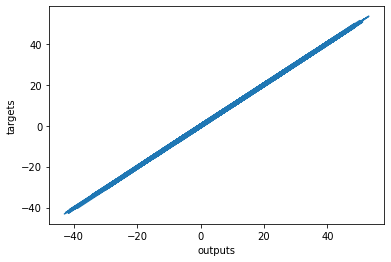

In [0]:
plt.plot(np.squeeze(model.predict_on_batch(training_data['inputs'])),np.squeeze(training_data['targets']))
plt.xlabel('outputs')
plt.ylabel('targets')
plt.show()